In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Statistical Power Assignment

In [2]:
import numpy as np
import pandas as pd

from scipy import stats
from statsmodels.stats.power import TTestIndPower
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

### Computing Sample Size Required

Suppose we are conducting a test where we have:

- Effect size of 0.5
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of a sample size would we need for this experiment?

In [3]:
import math

analysis = TTestIndPower()

result = analysis.solve_power(
    effect_size=0.5, nobs1=None, alpha=0.05, power=0.8, ratio=1.0
)
2 * math.ceil(result)

128

<IPython.core.display.Javascript object>

### Computing Effect Size Required

Suppose we are conducting a test where we have:

- Sample size of 100
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of an effect size would we need to see for this experiment?

In [4]:
effect_size = analysis.solve_power(nobs1=100, alpha=0.05, power=0.8, ratio=1.0)

effect_size

0.3981391173911276

<IPython.core.display.Javascript object>

Generate a power plot that shows how the statistical power of this test would change based on the number of observations and varying effect sizes.

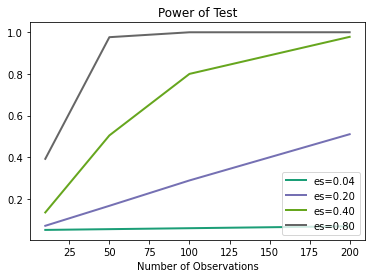

<IPython.core.display.Javascript object>

In [5]:
sample_sizes = np.array([100 * 0.1, 100 * 0.5, 100, 100 * 2])
effect_sizes = np.array(
    [effect_size * 0.1, effect_size * 0.5, effect_size, effect_size * 2]
)

analysis.plot_power(
    dep_var="nobs", nobs=sample_sizes, alpha=0.05, effect_size=effect_sizes
)
plt.show()

### Computing Statistical Power

Suppose we are conducting a test where we have:

- Effect size of 0.4
- Sample size of 100
- Significance level of 0.05

What would be the statistical power for this experiment?

In [6]:
analysis = TTestIndPower()

stat_power = analysis.solve_power(effect_size=0.4, nobs1=100, alpha=0.05)

stat_power

0.8036474965430769

<IPython.core.display.Javascript object>

Generate a plot that examines how the statistical power of this experiment would change based on different significance levels.

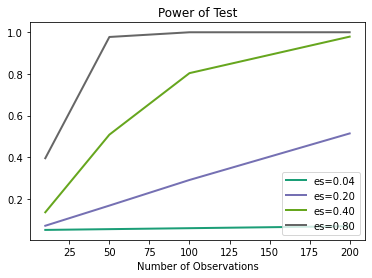

<IPython.core.display.Javascript object>

In [7]:
sample_sizes = np.array([100 * 0.1, 100 * 0.5, 100, 100 * 2])
effect_sizes = np.array([0.4 * 0.1, 0.4 * 0.5, 0.4, 0.4 * 2])

analysis.plot_power(
    dep_var="nobs", nobs=sample_sizes, alpha=0.05, effect_size=effect_sizes
)
plt.show()

## Computing Statistical Power for a Real Data Set

Yesterday afternoon, you conducted a t-test on the titanic data set to determine whether there was a significant difference between the average age of passengers who survived and those who did not survive. In this section, compute the statistical power of that test.

### Import the data, and drop rows where `'Age'` is NA.

In [8]:
data_url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv"

<IPython.core.display.Javascript object>

In [9]:
df = pd.read_csv(data_url)

aws = df.dropna(subset=["Age"])

aws.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


<IPython.core.display.Javascript object>

### Summarize the number of observations and average age per group.

In [10]:
aws.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<IPython.core.display.Javascript object>

In [11]:
lived = aws[aws["Survived"] == 1]
died = aws[aws["Survived"] == 0]

print(lived["Age"].mean())
print(lived["Survived"].value_counts())
print(died["Age"].mean())
print(died["Survived"].value_counts())

28.343689655172415
1    290
Name: Survived, dtype: int64
30.62617924528302
0    424
Name: Survived, dtype: int64


<IPython.core.display.Javascript object>

### Perform t-test.

In [12]:
t, p = stats.ttest_ind(lived["Age"], died["Age"])
print(t)
print(p)

-2.06668694625381
0.03912465401348249


<IPython.core.display.Javascript object>

### Calculate the Effect Size

Effect size can be calculated by using a formula known as Cohen's d, which divides the difference in means between the two groups by their pooled standard deviation.

`effect_size = (mean_of_sample1 - mean_of_sample2) / pooled_stdev`

The pooled standard deviation in the denominator can be derived as follows.

`pooled_stdev = sqrt(((n_obs1 - 1) * var1 + (n_obs2 - 1) * var2) / (n_obs1 + n_obs2 - 2))`

Where `n_obs` is the number of observations and `var` is the variance of each sample.

**Write the code below to calculate the effect size for this test.**

In [13]:
n1 = lived["Age"].size
n2 = died["Age"].size
var1 = lived["Age"].var()
var2 = died["Age"].var()
pooled_stdev = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
means = lived["Age"].mean() - died["Age"].mean()
effect_size = means / pooled_stdev
effect_size

-0.15748597191363295

<IPython.core.display.Javascript object>

**Use the effect size you calculated to compute the statistical power of this test.**

In [14]:
analysis = TTestIndPower()
analysis.solve_power(effect_size=effect_size, nobs1=n1, alpha=0.05)

0.47345540796145313

<IPython.core.display.Javascript object>

**Determine the effect size we would need to see to get a statistical power of 0.8.**

In [15]:
analysis.solve_power(nobs1=n1, alpha=0.05, power=0.8)

0.23304636290655173

<IPython.core.display.Javascript object>

**Determine the sample size necessary to get a statistical power of 0.8.**

In [16]:
analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8)

633.8876889361577

<IPython.core.display.Javascript object>

**Generate a visualization that shows the significance level we would need to get a statistical power of 0.8.**

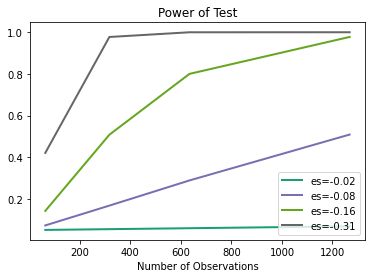

<IPython.core.display.Javascript object>

In [17]:
sample_sizes = np.array([634 * 0.1, 634 * 0.5, 634, 634 * 2])
es = effect_size
effect_sizes = np.array([es * 0.1, es * 0.5, es, es * 2])

analysis.plot_power(
    dep_var="nobs", nobs=sample_sizes, alpha=0.05, effect_size=effect_sizes
)
plt.show()

[[Text(0, 0, 'Lived'), Text(1, 0, 'Died')]]

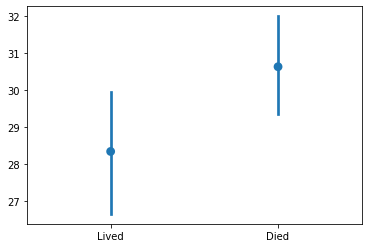

<IPython.core.display.Javascript object>

In [18]:
g = sns.pointplot(data=[lived["Age"], died["Age"]], join=False)

g.set(xticklabels=["Lived", "Died"])